<a href="https://colab.research.google.com/github/ncarolan/COS302/blob/main/HW4/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COS302 - HW4

In [7]:
import numpy as np
import pickle as pkl
from matplotlib import pyplot as plt

np.set_printoptions(precision=3, suppress=True)

## Problem 4

### (A)

In [8]:
# Download a subset of the MNIST dataset from https://www.cs.princeton.edu/courses/archive/fall23/cos302/files/mnist2000.pkl
! wget https://www.cs.princeton.edu/courses/archive/fall23/cos302/files/mnist2000.pkl

with open('mnist2000.pkl', 'rb') as f:
  mnist = pkl.load(f)

--2025-08-04 17:50:28--  https://www.cs.princeton.edu/courses/archive/fall23/cos302/files/mnist2000.pkl
Resolving www.cs.princeton.edu (www.cs.princeton.edu)... 128.112.136.67
Connecting to www.cs.princeton.edu (www.cs.princeton.edu)|128.112.136.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6760007 (6.4M)
Saving to: ‘mnist2000.pkl.1’

mnist2000.pkl.1     100%[===================>]   6.45M  7.61MB/s    in 0.8s    

2025-08-04 17:50:29 (7.61 MB/s) - ‘mnist2000.pkl.1’ saved [6760007/6760007]



In [12]:
print(mnist.keys())
mnist_train_images, mnist_train_labels = mnist['train_images'], mnist['train_labels']
print(f'MNIST Train |  Images: {mnist_train_images.shape} in {mnist_train_images.dtype},  Labels: {mnist_train_labels.shape} in {mnist_train_labels.dtype}')
mnist_test_images, mnist_test_labels = mnist['test_images'], mnist['test_labels']
print(f'MNIST Test  |  Images: {mnist_test_images.shape} in {mnist_test_images.dtype},   Labels: {mnist_test_labels.shape} in {mnist_test_labels.dtype}')

dict_keys(['train_images', 'train_labels', 'test_images', 'test_labels'])
MNIST Train |  Images: (2000, 28, 28) in float32,  Labels: (2000,) in int64
MNIST Test  |  Images: (150, 28, 28) in float32,   Labels: (150,) in int64


In [18]:
# Reshape ("unroll") training data
mnist_train_images = mnist_train_images.reshape((2000, 784))  # (2000,28,28) -> (2000,784)
# Center data by subtracting the mean image
centered_mnist_train_images = mnist_train_images - np.mean(mnist_train_images, axis=0)  # (2000,784)

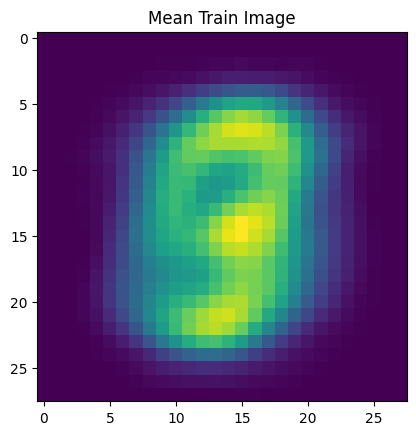

In [81]:
# Visualize the average train image
plt.title("Mean Train Image")
plt.imshow(np.mean(mnist_train_images, axis=0).reshape((28,28)))
plt.show()

### (B)

In [20]:
# Compute "scatter matrix"
scatter = centered_mnist_train_images.T @ centered_mnist_train_images  # (784,784)

### (C)

In [25]:
# Compute eigenvalues and eigenvectors for the scatter matrix
e_values, e_vectors = np.linalg.eigh(scatter)  # e_vectors[:, i] is the normalized eigenvector corresponding to e_values[i]
print(f'{e_values.shape} eigenvalues corresponding to eigenvectors with shape: {e_vectors.shape}')

(784,) eigenvalues corresponding to eigenvectors with shape: (784, 784)


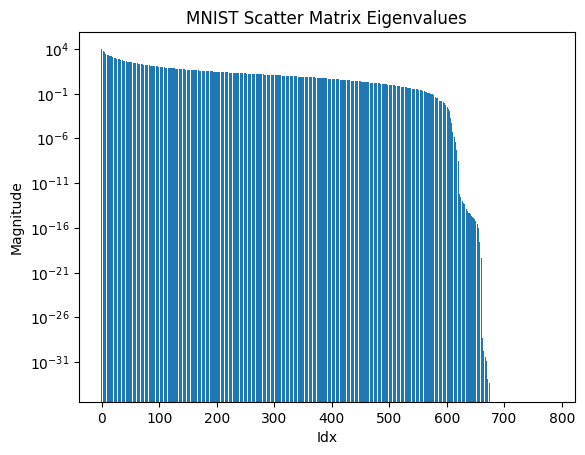

In [27]:
plt.bar(range(len(e_values)), np.sort(e_values)[::-1])
plt.yscale('log')  # Log scale

plt.title('MNIST Scatter Matrix Eigenvalues')
plt.xlabel('Idx')
plt.ylabel('Magnitude')

plt.show()

### (D)

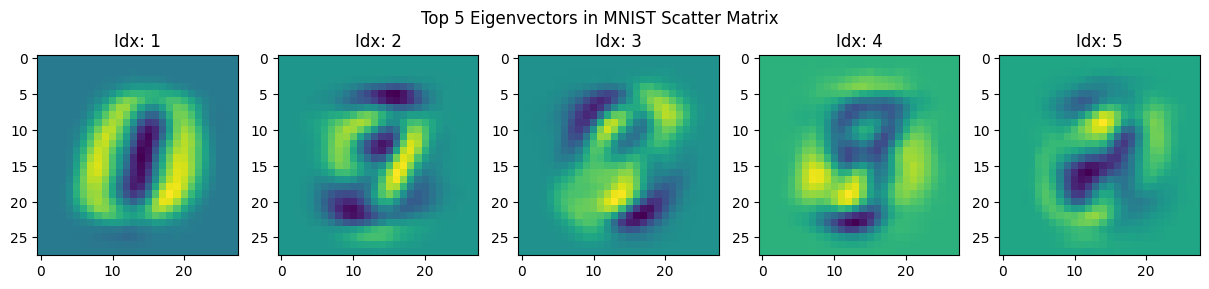

In [83]:
TOP_N = 5

fig, ax = plt.subplots(1, TOP_N, figsize=(TOP_N*3, 3))
plt.suptitle(f'Top {TOP_N} Eigenvectors in MNIST Scatter Matrix')

for idx in range(1, TOP_N+1, 1):
  vec = e_vectors[:, -idx]  # np.linalg.eigh returns eignvalues in increasing order
  vec = vec.reshape((28,28))
  ax[idx-1].imshow(vec)
  ax[idx-1].set_title(f'Idx: {idx}')

plt.show()

### (E)

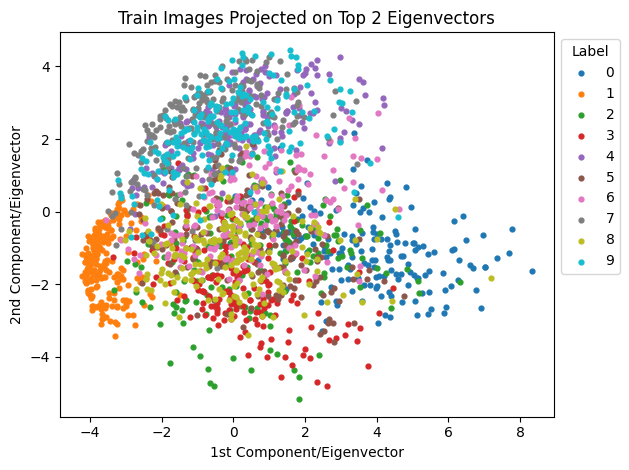

In [49]:
# Project image vectors along 2 largest eigenvectors
proj_1 = centered_mnist_train_images @ e_vectors[:, -1].T  # (2000,)
proj_2 = centered_mnist_train_images @ e_vectors[:, -2].T  # (2000,)

for label in np.unique(mnist_train_labels):
    idxs = mnist_train_labels == label
    plt.scatter(proj_1[idxs], proj_2[idxs], label=str(label), s=12)

plt.xlabel('1st Component/Eigenvector')
plt.ylabel('2nd Component/Eigenvector')
plt.title('Train Images Projected on Top 2 Eigenvectors')
plt.legend(title='Label', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

### (F)

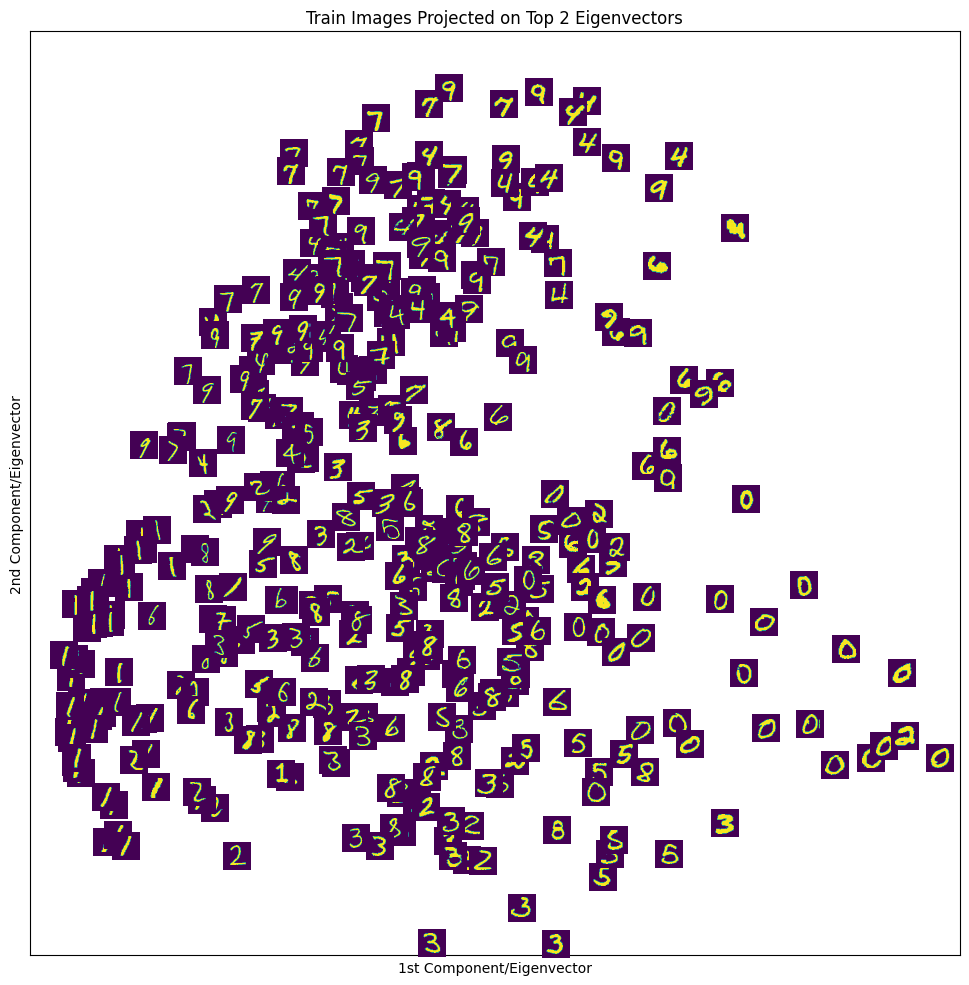

In [80]:
proj = np.stack((proj_1, proj_2), axis=1)

# Make the projections into [0, 1]
proj = proj - np.min(proj, axis=0)
proj = proj / np.max(proj, axis=0)

# Create a 12" x 12" figure.
viz_fig = plt.figure(figsize=(12., 12.))

# Get the figure width and height in pixels.
width, height = (viz_fig.get_size_inches() * viz_fig.dpi) - 200
plt.plot()  # Colab seems to require this to render.

# Loop over images. Could do all 2000 but it’s crowded.
for ii in range(400):
    # Render each image in a location on the figure.
    plt.figimage(mnist['train_images'][ii, :, :],
                xo=proj[ii, 0] * width + 50,
                yo=(proj[ii, 1] * height - 100),  # hack to make visible
                origin='upper')

plt.xticks([])
plt.yticks([])
plt.xlabel('1st Component/Eigenvector')
plt.ylabel('2nd Component/Eigenvector')
plt.title('Train Images Projected on Top 2 Eigenvectors')
plt.show()